In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\sujal\Downloads\archive\spam.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [7]:
df = df.rename(columns={'v1':'target','v2':'text'})

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
label = LabelEncoder()

In [10]:
df['target'] = label.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#df['target'] = df['target'].replace({'ham':0,'spam':1})

In [13]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
#!pip install nltk

In [18]:
import nltk

In [19]:
#nltk.download('punkt')

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#finding number of characters
df['num_char'] = df['text'].apply(len)

In [22]:
#finding number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[df['target']==0][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==1][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
#!pip install corpus

In [28]:
#nltk.download('stopwords')

In [29]:
#data preprocessing

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [31]:
ps = PorterStemmer()

In [32]:
#data preprocessing
def transform(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    text = y.copy()
    y.clear()
    
    return " ".join(text)

In [33]:
transform('I loved the YT lectures on machine Learning,how about you?')

'love yt lectur machin learn'

In [34]:
df['trans_text'] = df['text'].apply(transform)

In [35]:
df['trans_text'][10]

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
df.head()

,target,text,num_char,num_words,num_sentence,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
#!pip install wordcloud

In [38]:
from wordcloud import WordCloud
wc = WordCloud()

In [39]:
wc_ham = wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

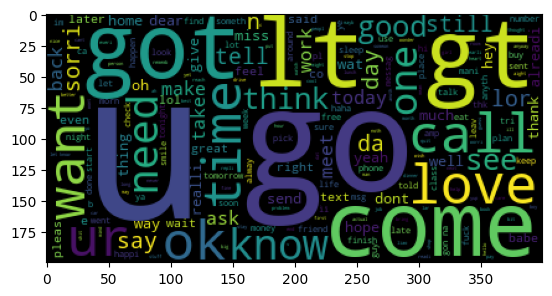

In [40]:
plt.imshow(wc_ham)

In [41]:
wc_spam = wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

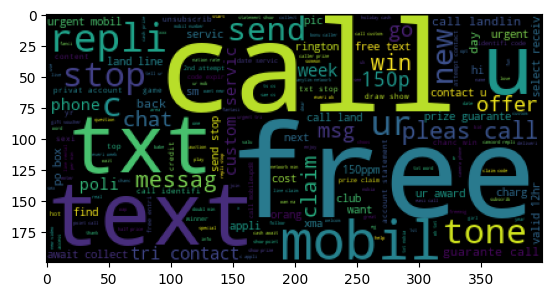

In [42]:
plt.imshow(wc_spam)

In [43]:
words_in_ham = []
for txt in df[df['target']==0]['trans_text'].tolist():
    for i in txt.split():
        words_in_ham.append(i)

In [44]:
len(words_in_ham)

35404

In [45]:
words_in_spam = []
for txt in df[df['target']==1]['trans_text'].tolist():
    for i in txt.split():
        words_in_spam.append(i)

In [46]:
len(words_in_spam)

9939

In [47]:
#!pip install Counter

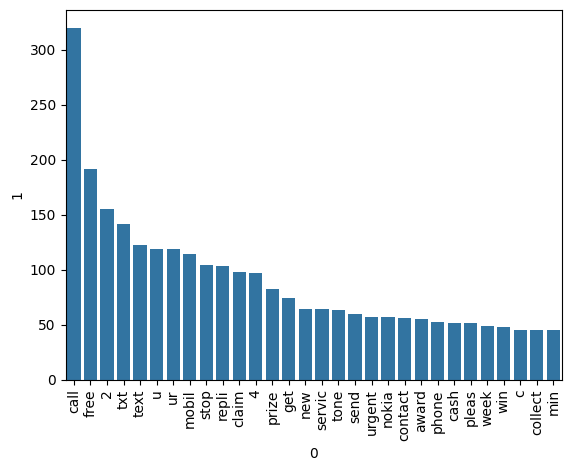

In [48]:
from collections import Counter
spam_words = pd.DataFrame(Counter(words_in_spam).most_common(30))
sns.barplot(data=spam_words,x=pd.DataFrame(Counter(words_in_spam).most_common(30))[0],y=pd.DataFrame(Counter(words_in_spam).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

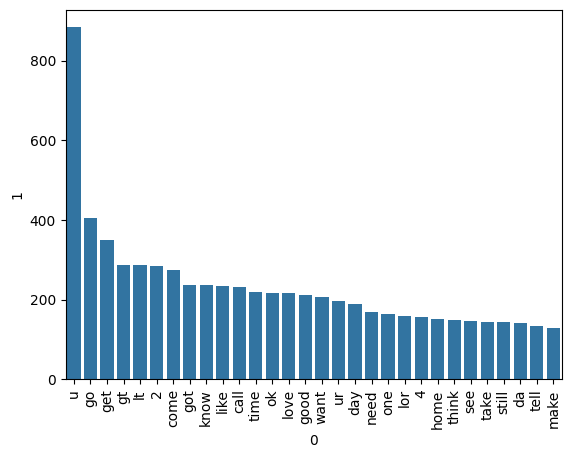

In [49]:
ham_words = pd.DataFrame(Counter(words_in_ham).most_common(30))
sns.barplot(data=ham_words,x=pd.DataFrame(Counter(words_in_ham).most_common(30))[0],y=pd.DataFrame(Counter(words_in_ham).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [51]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [52]:
X = tfidf.fit_transform(df['trans_text']).toarray()

In [53]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
y = df['target']

In [56]:
#from sklearn.preprocessing import MinMaxScaler

In [57]:
#scaling does not improve precision,hence we do not apply scaling
#mmsc = MinMaxScaler()
#X_scaled = mmsc.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [61]:
gnb = GaussianNB()

In [62]:
mnb = MultinomialNB()

In [63]:
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)

BernoulliNB()

In [65]:
#Bernoulli NB
y_pred1 = gnb.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

[[778 115]
 [ 27 114]]
0.8626692456479691
0.4978165938864629


In [67]:
#multinomial NB
y_pred2 = mnb.predict(X_test)

In [68]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9738878143133463
1.0
[[893   0]
 [ 27 114]]


In [69]:
#gaussian NB
y_pred3 = bnb.predict(X_test)

In [70]:
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9738878143133463
0.975
[[890   3]
 [ 24 117]]


In [71]:
#since multinomialNB gives best precision we select MNB

In [72]:
import pickle

In [73]:
with open('transform.pkl','wb') as file:
    pickle.dump(transform,file)

In [74]:
pickle.dump(tfidf,open('EmailClassifier_Vectoriser.pkl','wb'))
pickle.dump(mnb,open('Email_Classifier_Model.pkl','wb'))